<a href="https://colab.research.google.com/github/nishant6589/Review_Analysis/blob/main/web_scraping_product1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import math

In [21]:
#Comment out the Product_URL to enter the link manually
product_url = "https://www.amazon.in/Sparx-SX0796G-Green-Black-Running/dp/B0BLVVMXSN/ref=cm_cr_arp_d_pl_foot_top?ie=UTF8"
#product_url = input("Enter the Amazon product URL: ")

heads = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

In [24]:
response = requests.get(product_url, headers= heads)
status = response.status_code
print(status)#comment this line later
cookiees = response.cookies
print(cookiees)
if status == 200:
    print("possible")
elif status == 503:
    print("Amazon Server Denied Access")
elif status == 404:
    print("Page Not found")
else:
    print("Unexpected Error Occured")

soup1 = BeautifulSoup(response.content, 'html.parser')
url = soup1.find_all('a', {'data-hook':"see-all-reviews-link-foot"})
print(type(url))
print(url)

200
<RequestsCookieJar[<Cookie i18n-prefs=INR for .amazon.in/>, <Cookie session-id=257-2810317-4740160 for .amazon.in/>, <Cookie session-id-time=2082787201l for .amazon.in/>]>
possible
<class 'bs4.element.ResultSet'>
[<a class="a-link-emphasis a-text-bold" data-hook="see-all-reviews-link-foot" href="/Sparx-SX0796G-Green-Black-Running/product-reviews/B0BLVVMXSN?reviewerType=all_reviews">See more reviews</a>]


<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://completion.amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://completion.amazon.com" rel="preconnect"/>
<!-- sp:end-feature:cs-optimization -->
<!--
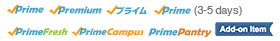
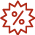

In [25]:
soup1

In [26]:
print(url)
# for href in url:
#     print(href)

print(url[0])

temp = str(url[0])
temp[83:-47]

review_page_url = "https://www.amazon.in" + temp[83:-47]
print(review_page_url)



[<a class="a-link-emphasis a-text-bold" data-hook="see-all-reviews-link-foot" href="/Sparx-SX0796G-Green-Black-Running/product-reviews/B0BLVVMXSN?reviewerType=all_reviews">See more reviews</a>]
<a class="a-link-emphasis a-text-bold" data-hook="see-all-reviews-link-foot" href="/Sparx-SX0796G-Green-Black-Running/product-reviews/B0BLVVMXSN?reviewerType=all_reviews">See more reviews</a>
https://www.amazon.in/Sparx-SX0796G-Green-Black-Running/product-reviews/B0BLVVMXSN


In [27]:
response = requests.get(review_page_url, headers= heads, cookies= cookiees)
status = response.status_code
print(status)#comment this line later
if status == 200:
    print("possible")
elif status == 503:
    print("Amazon Server Denied Access")
elif status == 404:
    print("Page Not found")
else:
    print("Unexpected Error Occured")
soup1 = BeautifulSoup(response.content, 'html.parser')
soup1

200
possible


<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://completion.amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://completion.amazon.com" rel="preconnect"/>
<!-- sp:end-feature:cs-optimization -->
<!--

In [28]:
review_count_find = soup1.find('div' , {'data-hook':"cr-filter-info-review-rating-count"}).text.strip()
type(review_count_find)

str

In [29]:
review_count_find_list = [word for word in review_count_find.split(' ')]
review_count = int(review_count_find_list[3])
review_count

7

In [30]:
total_pages = math.ceil(review_count/10)
total_pages

1

In [31]:
name = []
rating = []
date = []
review = []

for data in (soup1.find_all('span', {'class':"a-profile-name"})):
    name.append(data.get_text())

for data in (soup1.find_all('span', {'class':"a-icon-alt"})):
    rating.append(int(data.get_text()[:1]))

for data in (soup1.find_all('span', {'class':"a-size-base a-color-secondary review-date"})):
    date.append(data.get_text()[21:])


for data in (soup1.find_all('span', {'class':"a-size-base review-text review-text-content"})):
    data = data.get_text()
    data = data.replace('\n', '')
    data = data.replace('.','')
    review.append(data)

print(len(name),len(rating),len(date), len(review))



13 14 9 7


In [32]:
# df = pd.DataFrame({'Name' : name1[-10:], 'Ratings': rating[-10:], 'Date': date[-10:], 'Review': review})
# df

NameError: ignored

In [34]:
df = pd.DataFrame({'Name' : name[6:], 'Ratings': rating[7:], 'Date': date[2:], 'Review': review})
df

,Name,Ratings,Date,Review
0,Amazon Customer,5,3 May 2023,good
1,Kk Singh,1,12 March 2023,comfortable
2,Kk Singh,1,20 March 2023,osm ❤️
3,jitendra kachhela,1,20 January 2023,Fitting is good there is cushioning inside the...
4,jitendra kachhela,1,18 March 2023,This is not a good
5,Aashish Ravi Shankar,5,20 January 2023,The media could not be loa...
6,Aashish Ravi Shankar,5,22 January 2023,"This product is simply awesome, gives me ultim..."
